In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

2022-06-09 11:26:21.968235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 11:26:21.968272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
base_risco_credito = pd.read_csv('/home/lucas/Downloads/risco_credito.csv')

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [4]:
X_risco_credito = base_risco_credito.iloc[0:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
labe_encoder_historia = LabelEncoder()
labe_encoder_divida = LabelEncoder()
labe_encoder_garantias = LabelEncoder()
labe_encoder_renda = LabelEncoder()

In [8]:
X_risco_credito[:, 0] = labe_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = labe_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = labe_encoder_garantias.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = labe_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [9]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [10]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [14]:
# historia boa (0), divida alta (0), garantias nenhuma (1), renda > 35 (2)
# historia ruim (2), divida alta (0), garantias adequada (0), renda < 15 (0)
# a função predict retorna apenas a classe. Não o valor da probabilidade

previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [15]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [16]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [17]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [18]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [19]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [20]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [21]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [22]:
naive_credit_data = GaussianNB()
naive_credit_data = naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

In [23]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [24]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
# para saber a taxa de acerto, eu passo como primeiro parâmetro
# os dados reais e os de previões do algoritmo

accuracy_score(y_credit_teste, previsoes)

0.938

In [29]:
# numero de acertos por classes
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [32]:
from yellowbrick.classifier import ConfusionMatrix

0.938

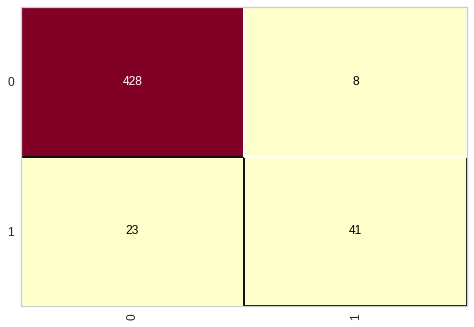

In [33]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [35]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



#### Base census

In [36]:
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [37]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [38]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [39]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [40]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [41]:
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

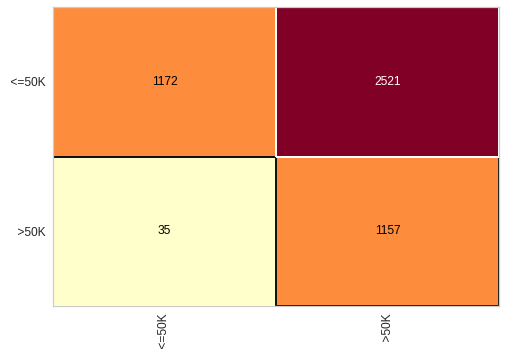

In [42]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [43]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

